<a href="https://colab.research.google.com/github/AngelTroncoso/Alura_Store_Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar una columna para identificar la tienda
tienda['tienda'] = 'tienda1'
tienda2['tienda'] = 'tienda2'
tienda3['tienda'] = 'tienda3'
tienda4['tienda'] = 'tienda4'

# Concatenar los DataFrames
datos = pd.concat([tienda, tienda2, tienda3, tienda4])

# Ver los primeros registros
datos.head(20)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda1
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250,tienda1
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175,tienda1
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904,tienda1
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175,tienda1
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175,tienda1


In [38]:
datos.shape

(9435, 15)

#1. Análisis de facturación



In [4]:
# se Agrupan Datos por tienda y se restan los costos para ver los ingresos Liquidos o netos de las operaciones de Ventas.
# y se añaden separadores de Mil.
utilidad_neta = (datos.groupby('tienda')['Precio'].sum() - datos.groupby('tienda')['Costo de envío'].sum()).apply(lambda x: "{:,.0f}".format(x))
print (utilidad_neta)

tienda
tienda1    1,089,502,500
tienda2    1,056,858,400
tienda3    1,039,503,000
tienda4      983,058,300
dtype: object


In [5]:
# se cambia tipo de variable fecha para poder extraer el valor de año y mes a el atributo fecha de Compra.
datos['Fecha de Compra'] = pd.to_datetime(datos['Fecha de Compra'])
datos['Año de Compra'] = datos['Fecha de Compra'].dt.year
datos['Mes de Compra'] = datos['Fecha de Compra'].dt.month
datos.head()

<ipython-input-5-c87cd323d1b5>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  datos['Fecha de Compra'] = pd.to_datetime(datos['Fecha de Compra'])


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda,Año de Compra,Mes de Compra
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda1,2021,1
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda1,2022,5
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda1,2021,3
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda1,2022,5
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda1,2020,11


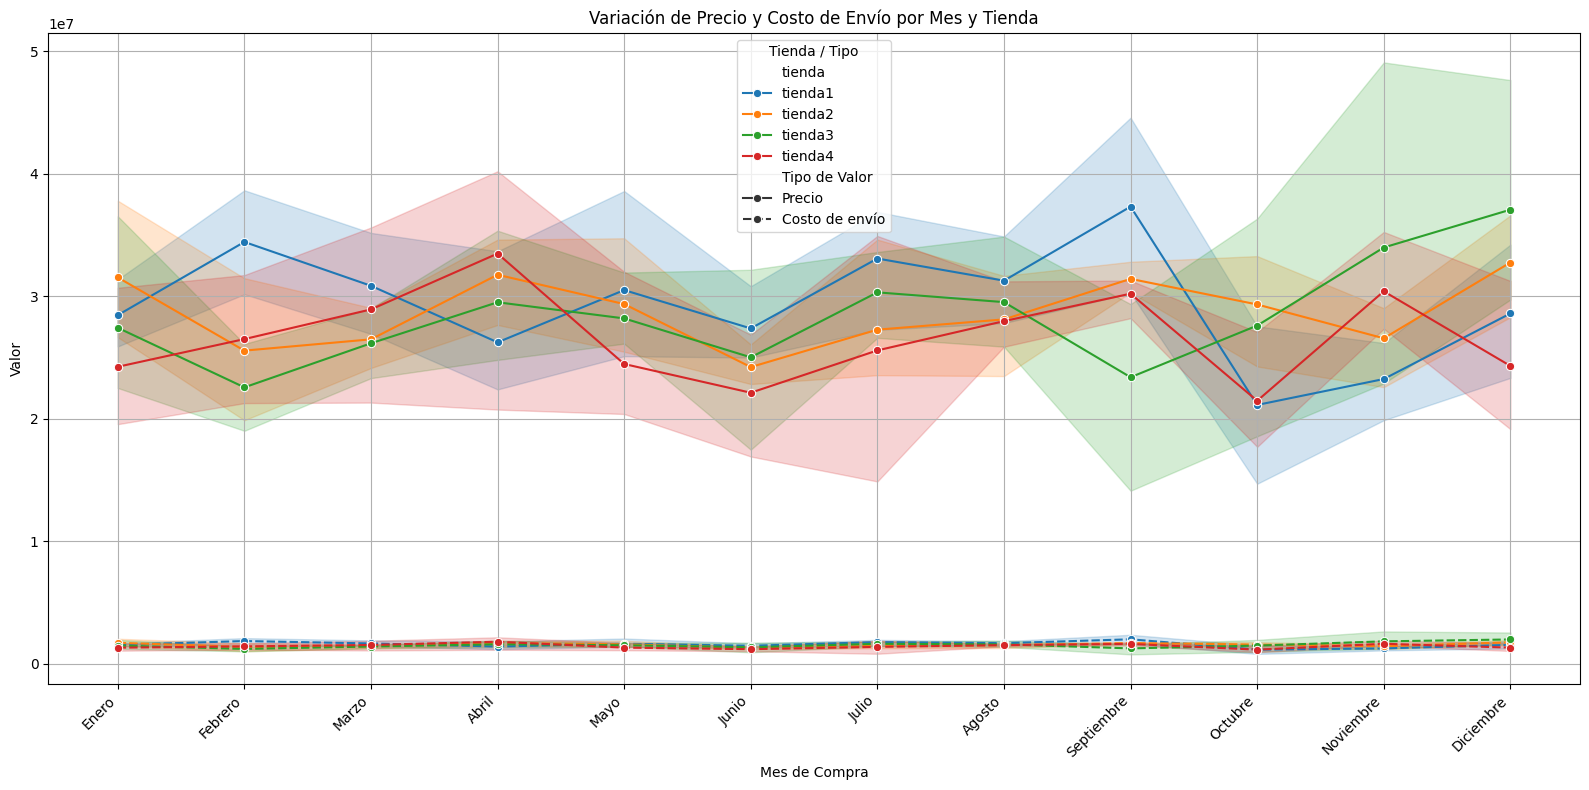

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preparar los datos para el gráfico de líneas múltiples
melted_df = pd.melt(facturacion_con_envio,
                    id_vars=['Año de Compra', 'Mes de Compra', 'tienda'],
                    value_vars=['Precio', 'Costo de envío'],
                    var_name='Tipo de Valor',
                    value_name='Valor')

# Diccionario para mapear números de mes a nombres en español
meses_espanol = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

plt.figure(figsize=(16, 8))
sns.lineplot(x='Mes de Compra', y='Valor', hue='tienda', style='Tipo de Valor', data=melted_df, marker='o')
plt.title('Variación de Precio y Costo de Envío por Mes y Tienda')
plt.xlabel('Mes de Compra')
plt.ylabel('Valor')
plt.xticks(range(1, 13), [meses_espanol[i] for i in range(1, 13)], rotation=45, ha='right')
plt.legend(title='Tienda / Tipo')
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [8]:
datos.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda,Año de Compra,Mes de Compra
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda1,2021,1
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda1,2022,5
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda1,2021,3
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda1,2022,5
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda1,2020,11


In [9]:
# Obtener el número de filas y columnas
num_filas = datos.shape[0]
num_columnas = datos.shape[1]

print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")


Número de filas: 9435
Número de columnas: 15


In [19]:
# Agrupar por categoría y contar la cantidad de productos
ventas_por_categoria = datos.groupby('Categoría del Producto')['Producto'].count()
ventas_por_categoria

,Producto
Categoría del Producto,
Artículos para el hogar,730
Deportes y diversión,1113
Electrodomésticos,1149
Electrónicos,1772
Instrumentos musicales,753
Juguetes,1290
Libros,742
Muebles,1886


In [22]:
# Agrupar por tienda y categoría, luego contar la cantidad de productos vendidos
ventas_por_categoria_tienda = datos.groupby(['tienda', 'Categoría del Producto'])['Producto'].count().reset_index()

# Renombrar la columna 'Producto' para mayor claridad
ventas_por_categoria_tienda.rename(columns={'Producto': 'Cantidad Vendida'}, inplace=True)

ventas_por_categoria_tienda


,tienda,Categoría del Producto,Cantidad Vendida
0,tienda1,Artículos para el hogar,171
1,tienda1,Deportes y diversión,284
2,tienda1,Electrodomésticos,312
3,tienda1,Electrónicos,448
4,tienda1,Instrumentos musicales,182
5,tienda1,Juguetes,324
6,tienda1,Libros,173
7,tienda1,Muebles,465
8,tienda2,Artículos para el hogar,181
9,tienda2,Deportes y diversión,275


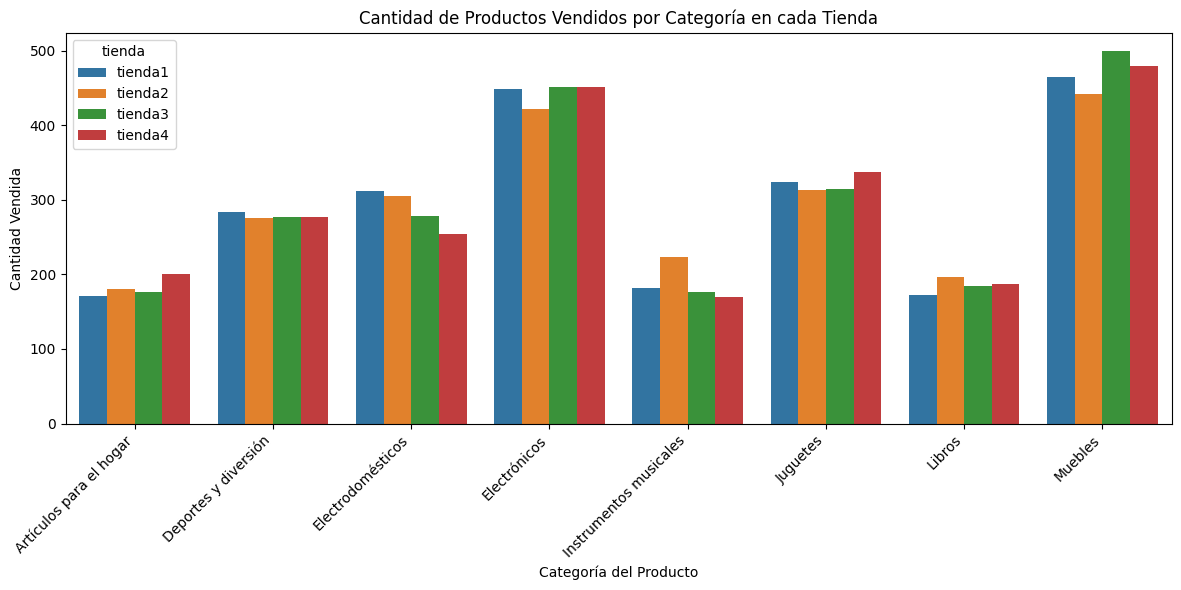

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Categoría del Producto', y='Cantidad Vendida', hue='tienda', data=ventas_por_categoria_tienda)
plt.title('Cantidad de Productos Vendidos por Categoría en cada Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Calificación Promedio por Tienda:
     tienda Calificación Promedio
0  tienda1                  3.98
1  tienda2                  4.04
2  tienda3                  4.05
3  tienda4                  4.00


<ipython-input-41-8d92a326ce08>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tienda', y='Calificación Promedio', data=calificacion_promedio_por_tienda, palette='viridis')


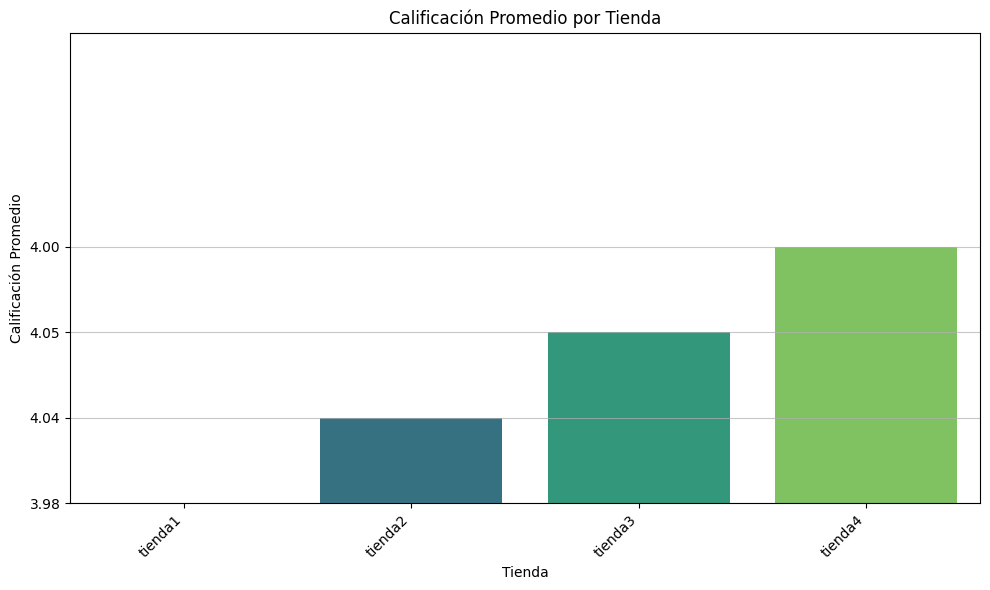

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la calificación promedio por tienda
calificacion_promedio_por_tienda = datos.groupby('tienda')['Calificación'].mean().reset_index()
calificacion_promedio_por_tienda = calificacion_promedio_por_tienda.rename(columns={'Calificación': 'Calificación Promedio'})

# Filtrar los datos para la 'tienda1'
tienda1_data = calificacion_promedio_por_tienda[calificacion_promedio_por_tienda['tienda'] == 'tienda1']

# Formatear la calificación promedio (opcional, para visualización)
calificacion_promedio_por_tienda['Calificación Promedio'] = calificacion_promedio_por_tienda['Calificación Promedio'].apply(lambda x: "{:.2f}".format(x))

print("Calificación Promedio por Tienda:\n", calificacion_promedio_por_tienda)

# Si quieres ver la calificación de todas las tiendas pero el eje y comenzando en cero:
plt.figure(figsize=(10, 6))
sns.barplot(x='tienda', y='Calificación Promedio', data=calificacion_promedio_por_tienda, palette='viridis')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, datos['Calificación'].max() + 0.5) # Establecer el límite inferior en 0
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [30]:
# Agrupar por tienda y producto, contar la cantidad vendida
productos_vendidos = datos.groupby(['tienda', 'Producto'])['Producto'].count().reset_index(name='Cantidad Vendida')

# Obtener los 10 productos más vendidos por tienda
top_10_productos = productos_vendidos.groupby('tienda').apply(lambda x: x.nlargest(10, 'Cantidad Vendida')).reset_index(drop=True)

# Obtener los 10 productos menos vendidos por tienda
bottom_10_productos = productos_vendidos.groupby('tienda').apply(lambda x: x.nsmallest(10, 'Cantidad Vendida')).reset_index(drop=True)

print("Top 10 productos más vendidos por tienda:\n", top_10_productos)
print("\nTop 10 productos menos vendidos por tienda:\n", bottom_10_productos)


Top 10 productos más vendidos por tienda:
      tienda                   Producto  Cantidad Vendida
0   tienda1                    Armario                60
1   tienda1                 Microondas                60
2   tienda1              TV LED UHD 4K                60
3   tienda1           Secadora de ropa                58
4   tienda1    Bloques de construcción                56
5   tienda1              Mesa de noche                56
6   tienda1        Balón de baloncesto                55
7   tienda1                  Bicicleta                54
8   tienda1                  Impresora                54
9   tienda1               Refrigerador                54
10  tienda2  Iniciando en programación                65
11  tienda2                 Microondas                62
12  tienda2                    Batería                61
13  tienda2          Guitarra acústica                58
14  tienda2                  Pandereta                58
15  tienda2           Secadora de ropa       

<ipython-input-30-6e2a6b6fa924>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_productos = productos_vendidos.groupby('tienda').apply(lambda x: x.nlargest(10, 'Cantidad Vendida')).reset_index(drop=True)
<ipython-input-30-6e2a6b6fa924>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_10_productos = productos_vendidos.groupby('tienda').apply(lambda x: x.nsmallest(10, 'Cantidad Vendida')).reset

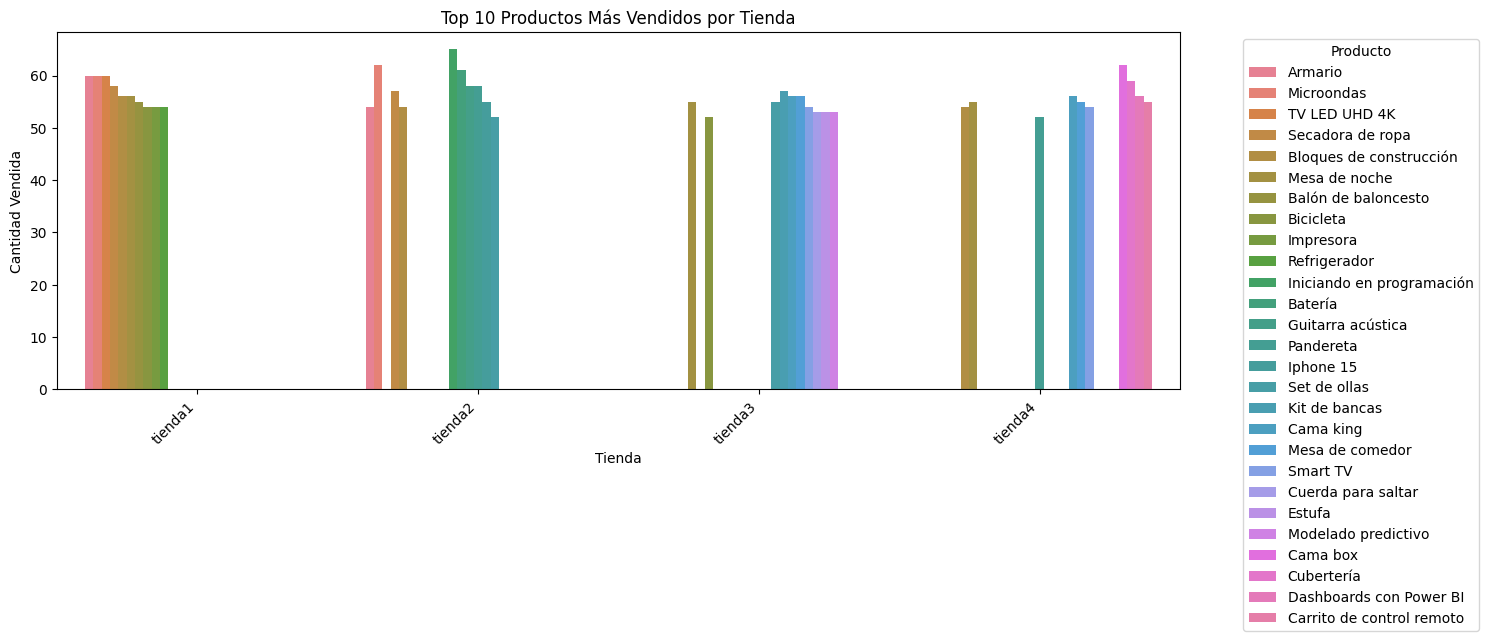

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'top_10_productos' es tu DataFrame

plt.figure(figsize=(12, 6))
sns.barplot(x='tienda', y='Cantidad Vendida', hue='Producto', data=top_10_productos)
plt.title('Top 10 Productos Más Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

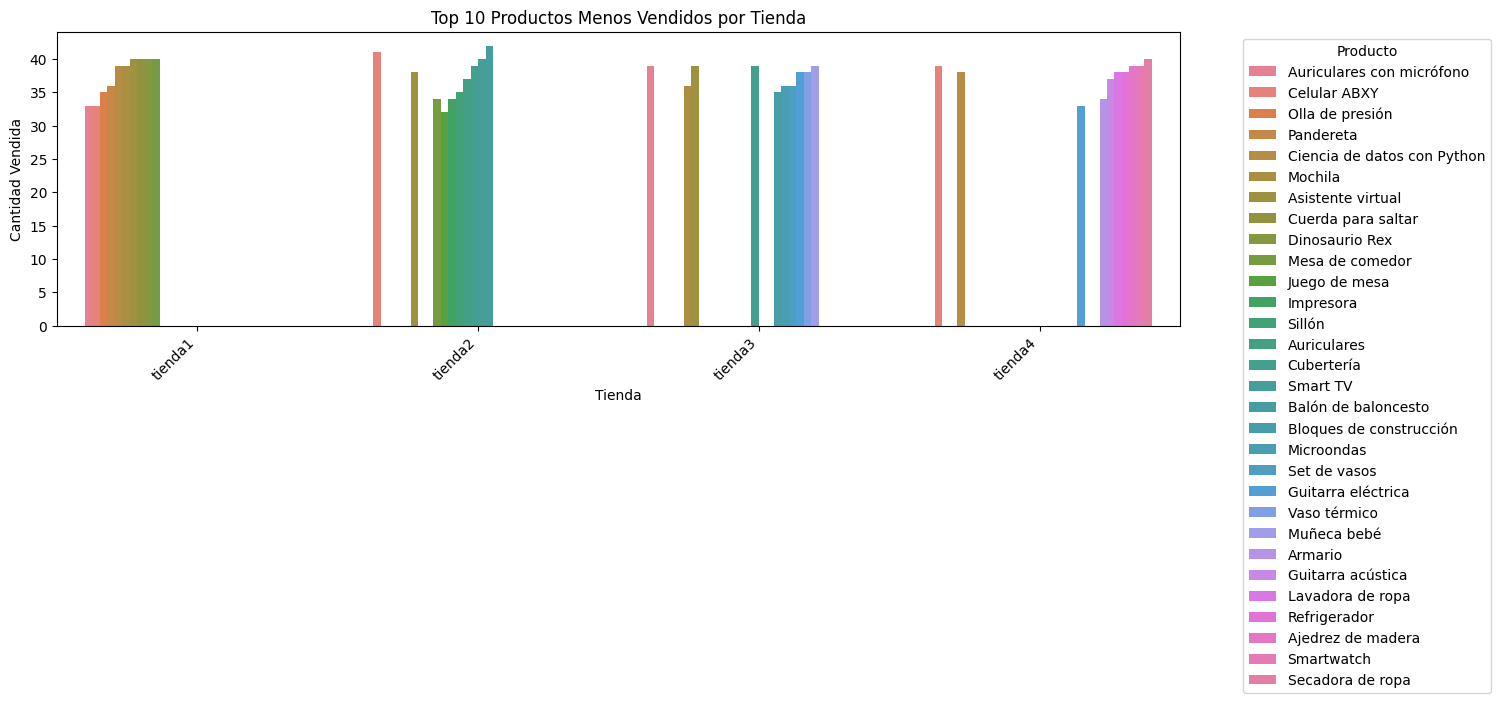

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'top_10_productos' es tu DataFrame

plt.figure(figsize=(12, 6))
sns.barplot(x='tienda', y='Cantidad Vendida', hue='Producto', data=bottom_10_productos)
plt.title('Top 10 Productos Menos Vendidos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5. Envío promedio por tienda

In [53]:
# Calcular el costo de envío promedio por tienda
envio_promedio = datos.groupby('tienda')['Costo de envío'].mean()

# Formatear el resultado sin decimales y con separadores de miles
envio_promedio_formateado = envio_promedio.apply(lambda x: "{:,.0f}".format(x))

envio_promedio_formateado


,Costo de envío
tienda,
tienda1,"26,019"
tienda2,"25,216"
tienda3,"24,806"
tienda4,"23,459"


<ipython-input-62-c6cd6bf200cd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=envio_promedio.index, y=envio_promedio.values, palette='viridis')


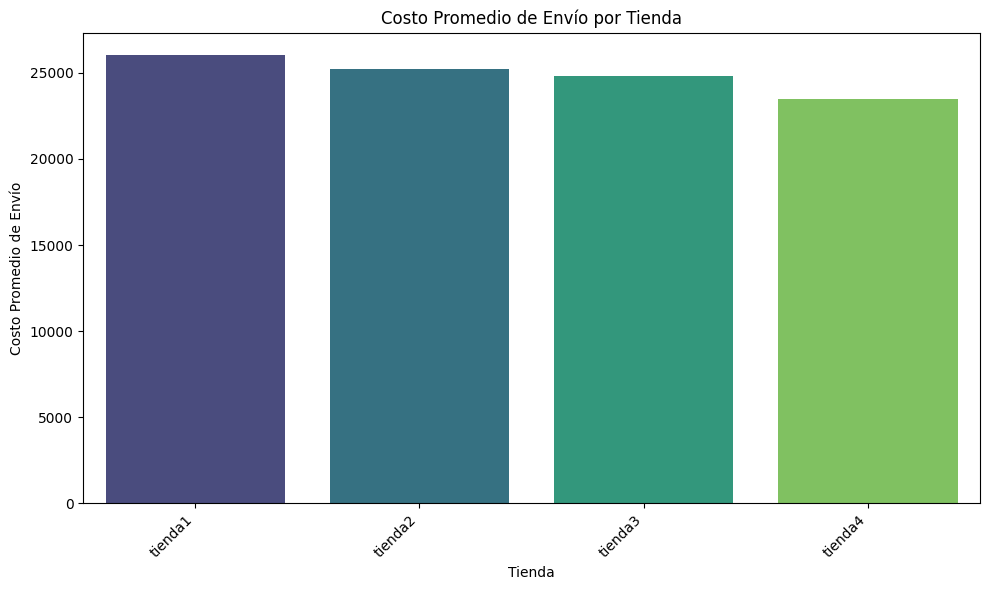

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'envio_promedio' es tu Series de Pandas con el costo promedio por tienda
# (tal como lo calculaste en tu código)

plt.figure(figsize=(10, 6))
sns.barplot(x=envio_promedio.index, y=envio_promedio.values, palette='viridis')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x si son largas
plt.tight_layout()
plt.show()